<a href="https://www.kaggle.com/code/parthabera/world-university-13-08-22-14?scriptVersionId=103246192" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-university-rankings/education_expenditure_supplementary_data.csv
/kaggle/input/world-university-rankings/educational_attainment_supplementary_data.csv
/kaggle/input/world-university-rankings/shanghaiData.csv
/kaggle/input/world-university-rankings/timesData.csv
/kaggle/input/world-university-rankings/cwurData.csv
/kaggle/input/world-university-rankings/school_and_country_table.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

In [3]:
data=pd.read_csv('../input/world-university-rankings/cwurData.csv')

In [4]:
data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [5]:
data.drop('institution',axis=1,inplace=True)

In [6]:
data.drop('year',axis=1,inplace=True)

In [7]:
pd.DataFrame(data.isnull().sum())

,0
world_rank,0
country,0
national_rank,0
quality_of_education,0
alumni_employment,0
quality_of_faculty,0
publications,0
influence,0
citations,0
broad_impact,200


In [8]:
data.drop('broad_impact',axis=1,inplace=True)

In [9]:
encoder=LabelEncoder()



data['country']=encoder.fit_transform(data['country'])
country_mappings={index:label for index,label in enumerate(encoder.classes_)}

In [10]:
country_mappings

{0: 'Argentina',
 1: 'Australia',
 2: 'Austria',
 3: 'Belgium',
 4: 'Brazil',
 5: 'Bulgaria',
 6: 'Canada',
 7: 'Chile',
 8: 'China',
 9: 'Colombia',
 10: 'Croatia',
 11: 'Cyprus',
 12: 'Czech Republic',
 13: 'Denmark',
 14: 'Egypt',
 15: 'Estonia',
 16: 'Finland',
 17: 'France',
 18: 'Germany',
 19: 'Greece',
 20: 'Hong Kong',
 21: 'Hungary',
 22: 'Iceland',
 23: 'India',
 24: 'Iran',
 25: 'Ireland',
 26: 'Israel',
 27: 'Italy',
 28: 'Japan',
 29: 'Lebanon',
 30: 'Lithuania',
 31: 'Malaysia',
 32: 'Mexico',
 33: 'Netherlands',
 34: 'New Zealand',
 35: 'Norway',
 36: 'Poland',
 37: 'Portugal',
 38: 'Puerto Rico',
 39: 'Romania',
 40: 'Russia',
 41: 'Saudi Arabia',
 42: 'Serbia',
 43: 'Singapore',
 44: 'Slovak Republic',
 45: 'Slovenia',
 46: 'South Africa',
 47: 'South Korea',
 48: 'Spain',
 49: 'Sweden',
 50: 'Switzerland',
 51: 'Taiwan',
 52: 'Thailand',
 53: 'Turkey',
 54: 'USA',
 55: 'Uganda',
 56: 'United Arab Emirates',
 57: 'United Kingdom',
 58: 'Uruguay'}

In [11]:
y=data['world_rank']
X=data.drop('world_rank',axis=1)

In [12]:
X

,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,54,1,7,9,1,1,1,1,5,100.00
1,54,2,9,17,3,12,4,4,1,91.67
2,54,3,17,11,5,4,2,2,15,89.50
3,57,1,10,24,4,16,16,11,50,86.17
4,54,4,2,29,7,37,22,22,18,85.21
...,...,...,...,...,...,...,...,...,...,...
2195,37,7,367,567,218,926,845,812,816,44.03
2196,14,4,236,566,218,997,908,645,871,44.03
2197,4,18,367,549,218,830,823,812,824,44.03
2198,48,40,367,567,218,886,974,812,651,44.02


In [13]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)


In [14]:
X

,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score
0,1.035555,-0.759305,-2.199214,-1.864211,-2.777926,-1.511102,-1.512871,-1.560375,-1.563683,6.727841
1,1.035555,-0.739974,-2.182808,-1.821370,-2.746694,-1.474881,-1.502979,-1.549025,-1.578285,5.654255
2,1.035555,-0.720642,-2.117185,-1.853501,-2.715462,-1.501224,-1.509574,-1.556592,-1.527178,5.374581
3,1.191751,-0.759305,-2.174605,-1.783884,-2.731078,-1.461710,-1.463409,-1.522540,-1.399410,4.945405
4,1.035555,-0.701311,-2.240229,-1.757109,-2.684229,-1.392561,-1.443625,-1.480922,-1.516227,4.821678
...,...,...,...,...,...,...,...,...,...,...
2195,0.150445,-0.643316,0.753847,1.123952,0.610775,1.534754,1.270193,1.508032,1.396881,-0.485678
2196,-1.047057,-0.701311,-0.320739,1.118597,0.610775,1.768544,1.477933,0.876190,1.597659,-0.485678
2197,-1.567710,-0.430670,0.753847,1.027560,0.610775,1.218643,1.197648,1.508032,1.426085,-0.485678
2198,0.723163,-0.005378,0.753847,1.123952,0.610775,1.403041,1.695566,1.508032,0.794547,-0.486967


In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=0.8)

In [16]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [17]:
print(f"print the score {model.score(X_test,y_test)}")

print the score 0.9164647552453737


<AxesSubplot:>

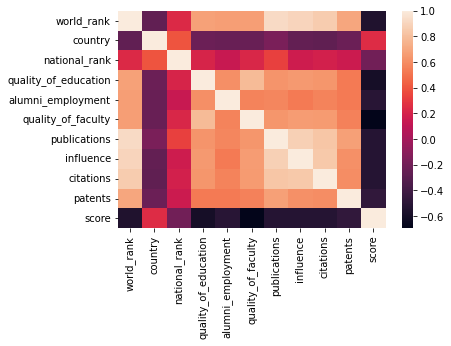

In [18]:
sns.heatmap(data.corr())